## Computing dynamical properties for polynomial, chaotic systems
In this example, we show some new functionality for computing dynamical and other properties for the chaotic systems that are polynomially nonlinear, with degree less than or equal to four. This example and associated functionality was contributed by Lanyue Zhang and Dr. Alan Kaptanoglu.

In [1]:
from dysts.base import make_trajectory_ensemble
from dysts.base import get_attractor_list
import dysts.flows as flows
import dysts.datasets as datasets
import numpy as np
from dysts.analysis import sample_initial_conditions
from dysts.equation_utils import *

### Mean-error description length (MEDL) of the equations 
The first property we compute for the dataset is the MEDL, which is a measure of the syntactic and descriptive complexity of the underlying equations. 

According to the AI Feynman 2.0 paper, $m\times v\times v/2$ gives MEDL of about 13.58. Notice that since there is no division operation in the chaotic systems we use, there is no need to support the division symbol. Here, we compute the MEDL of $m\times v\times v\times2$, which should give the same result.

In [2]:
get_expr_complexity('m * v * v * 2')

13.5849625007212

## Prepare 70 polynomially nonlinear systems

Simplify attributes to only "parameters" to reduce unnecessary computation.

In [3]:
# experimental system list
systems_list = ["Aizawa", "Arneodo", "Bouali2", 
                "GenesioTesi", "HyperBao", "HyperCai", "HyperJha", 
                "HyperLorenz", "HyperLu", "HyperPang", "Laser",
                "Lorenz", "LorenzBounded", 
                "MooreSpiegel", "Rossler", "ShimizuMorioka",
                "HenonHeiles", "GuckenheimerHolmes", "Halvorsen", "KawczynskiStrizhak",
                "VallisElNino", "RabinovichFabrikant", "NoseHoover", "Dadras", "RikitakeDynamo",
                "NuclearQuadrupole", "PehlivanWei", "SprottTorus", "SprottJerk", "SprottA", "SprottB",
                "SprottC", "SprottD", "SprottE", "SprottF", "SprottG", "SprottH", "SprottI", "SprottJ",
                "SprottK", "SprottL", "SprottM", "SprottN", "SprottO", "SprottP", "SprottQ", "SprottR",
                "SprottS", "Rucklidge", "Sakarya", "RayleighBenard", "Finance", "LuChenCheng",
                "LuChen", "QiChen", "ZhouChen", "BurkeShaw", "Chen", "ChenLee", "WangSun", "DequanLi",
                "NewtonLiepnik", "HyperRossler", "HyperQi", "Qi", "LorenzStenflo", "HyperYangChen", 
                "HyperYan", "HyperXu", "HyperWang", "Hadley",
               ]
alphabetical_sort = np.argsort(systems_list)
systems_list = np.array(systems_list)[alphabetical_sort]

# Get training and testing trajectories for all the experimental systems and their attributes
n = 500
all_sols_train = dict()

# simplify attributes
attributes = ["parameters"]

all_properties = dict()

for i, equation_name in enumerate(systems_list):
    eq = getattr(flows, equation_name)()
    try:
        ic_train, ic_test = sample_initial_conditions(eq, 2, traj_length=1000, pts_per_period=30)
        eq.ic = ic_train
        t_sol, sol = eq.make_trajectory(n, method="Radau", resample=True, return_times=True, standardize=False)
        all_sols_train[equation_name] = sol
        attr_vals = [getattr(eq, item, None) for item in attributes]
        all_properties[equation_name] = dict(zip(attributes, attr_vals))
    except SystemError:
        print('Could not load one of the systems: ', equation_name)
    except TypeError:
        print('Could not load one of the systems ', equation_name)

# rearrange parameters in list
num_attractors = len(systems_list)

param_list = []

for system in systems_list:
    param_list.append(all_properties[system]['parameters'])

## Compute MEDL

One may obtain the MEDL of a list of systems using the oneline code as follows.

In [4]:
medl_list = compute_medl(systems_list, param_list)
for i, system in enumerate(systems_list):
    print(system, "MEDL:", medl_list[i])

Aizawa MEDL: 122.18299067736842
Arneodo MEDL: 31.019550008653873
Bouali2 MEDL: 77.69207659553408
BurkeShaw MEDL: 37.34856396581859
Chen MEDL: 40.18506523353571
ChenLee MEDL: 37.150849518197795
Dadras MEDL: 52.70600608014152
DequanLi MEDL: 69.21055681077809
Finance MEDL: 43.37291214297528
GenesioTesi MEDL: 28.4345875079327
GuckenheimerHolmes MEDL: 120.50338698022776
Hadley MEDL: 73.85288120852478
Halvorsen MEDL: 101.06477719407376
HenonHeiles MEDL: 29.9315685693242
HyperBao MEDL: 55.24558702324589
HyperCai MEDL: 65.1693962282014
HyperJha MEDL: 57.567515118133244
HyperLorenz MEDL: 57.567515118133244
HyperLu MEDL: 52.92365892835852
HyperPang MEDL: 55.19269349816422
HyperQi MEDL: 84.49793939376858
HyperRossler MEDL: 39.93156856932417
HyperWang MEDL: 54.858009173586574
HyperXu MEDL: 57.214152983811836
HyperYan MEDL: 85.750738751617
HyperYangChen MEDL: 47.62919048309068
KawczynskiStrizhak MEDL: 57.851253107868175
Laser MEDL: 62.421783389835674
Lorenz MEDL: 37.86313713864835
LorenzBounded MED

### Compute remaining dynamical properties 
Here we compute the nonlinearity and an average scale separation (the level of chaos, as measured by the largest Lyapunov exponent, is already computed in the dysts code).
The first property we compute is a breakdown of the nonlinear structure of each equation. The second property is a rough metric for the amount of scale separation in the underlying equations -- the ratio of the "period" and "dt" parameters for each system.

In [5]:
# attributes list
attributes = [
    "maximum_lyapunov_estimated",
    "embedding_dimension",
    "parameters",
    "dt",
    "period",
]

# Get attributes
all_properties = dict()
for i, equation_name in enumerate(systems_list):
    eq = getattr(flows, equation_name)()
    attr_vals = [getattr(eq, item, None) for item in attributes]
    all_properties[equation_name] = dict(zip(attributes, attr_vals))

num_attractors = len(systems_list)
lyap_list = []
dimension_list = []
param_list = []
scale_list_avg = []

for system in systems_list:
    lyap_list.append(all_properties[system]['maximum_lyapunov_estimated'])
    dimension_list.append(all_properties[system]['embedding_dimension'])
    param_list.append(all_properties[system]['parameters'])
    
    # Ratio of dominant (average) to smallest timescales
    scale_list_avg.append(
        all_properties[system]['period'] / all_properties[system]['dt']
    )

true_coefficients = make_dysts_true_coefficients(systems_list, 
                                                 all_sols_train, 
                                                 dimension_list, 
                                                 param_list)
nonlinearities = nonlinear_terms_from_coefficients(true_coefficients)

### Plot all of the dynamical properties we have computed

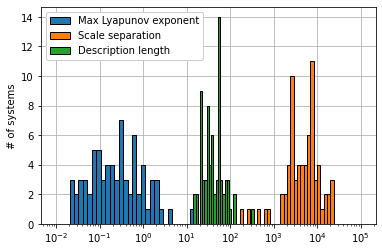

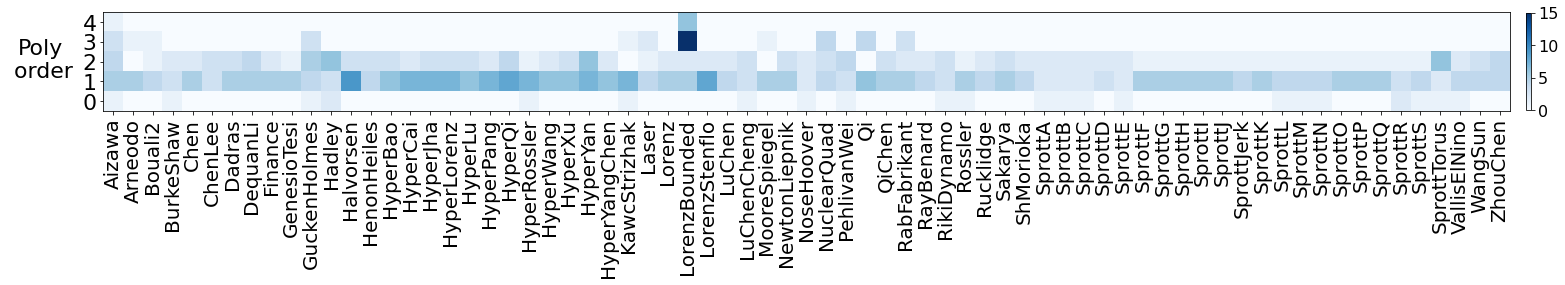

In [13]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

systems_list_cleaned = []
for i, system in enumerate(systems_list):
    if system == "GuckenheimerHolmes":
        systems_list_cleaned.append("GuckenHolmes")
    elif system == "NuclearQuadrupole":
        systems_list_cleaned.append("NuclearQuad")
    elif system == "RabinovichFabrikant":
        systems_list_cleaned.append("RabFabrikant")
    elif system == "KawczynskiStrizhak":
        systems_list_cleaned.append("KawcStrizhak")
    elif system == "RikitakeDynamo":
        systems_list_cleaned.append("RikiDynamo")
    elif system == "ShimizuMorioka":
        systems_list_cleaned.append("ShMorioka")
    elif system == "HindmarshRose":
        systems_list_cleaned.append("Hindmarsh")
    elif system == "RayleighBenard":
        systems_list_cleaned.append("RayBenard")
    else:
        systems_list_cleaned.append(system)
    
plt.figure()
medl_levels = np.logspace(1, 3, 40)
lyap_levels = np.logspace(-2, 2, 40)
scale_levels = np.logspace(2, 5, 40)

plt.hist(lyap_list, bins=lyap_levels, ec='k')
plt.hist(scale_list_avg, bins=scale_levels, ec='k')
plt.hist(medl_list, bins=medl_levels, ec='k')
plt.xlabel('')
plt.ylabel('# of systems')
plt.legend(['Max Lyapunov exponent', 'Scale separation', 'Description length'],
           framealpha=1.0)
plt.xscale('log')
plt.grid(True)
ax = plt.gca()
ax.set_axisbelow(True)

plt.figure(figsize=(30, 6))
plt.imshow(nonlinearities.T, aspect='equal', origin='lower', cmap='Blues')
plt.xticks(np.arange(num_attractors), rotation="vertical", fontsize=20)
ax = plt.gca()
plt.xlim(-0.5, num_attractors - 0.5)
ax.set_xticklabels(np.array(systems_list_cleaned))
plt.yticks(np.arange(5), fontsize=22)
plt.colorbar(shrink=0.3, pad=0.01).ax.tick_params(labelsize=16)
plt.ylabel('Poly\n order', rotation=0, fontsize=22)
ax.yaxis.set_label_coords(-0.045, 0.3)
plt.show()